# Predicting heart disease using machine learning
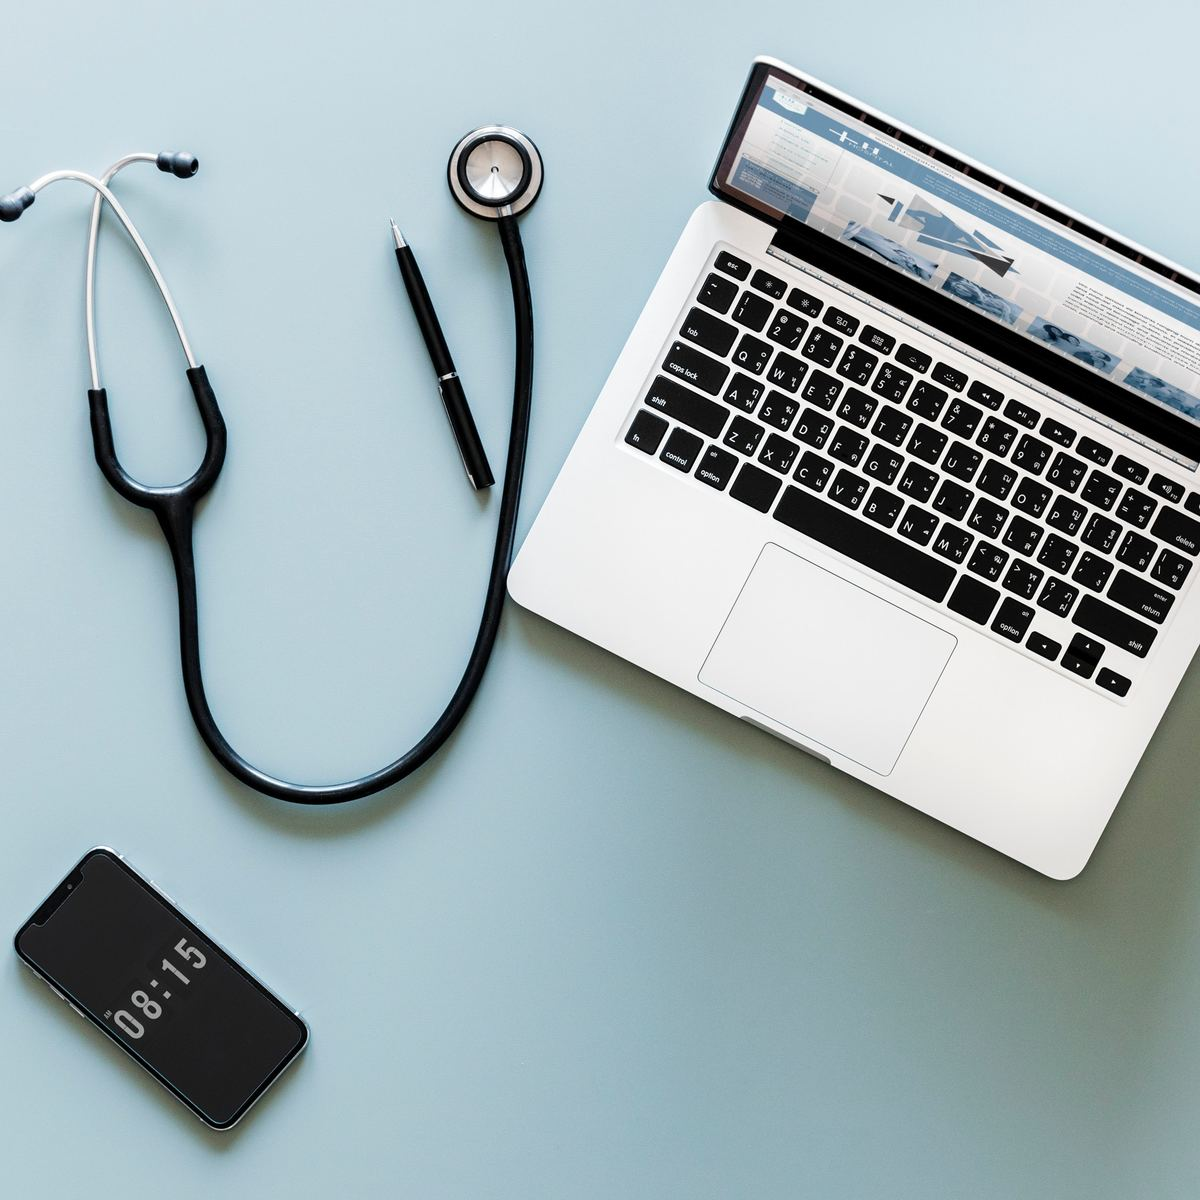
## Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## Features

This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary**

1. `age` - age in years
2. `sex` - (1 = male; 0 = female)
3. `cp` - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. `trestbps` - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. `chol` - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. `fbs` - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. `restecg` - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. `thalach` - maximum heart rate achieved
9. `exang` - exercise induced angina (1 = yes; 0 = no)
10. `oldpeak` - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. `slope` - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. `ca` - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. `thal` - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. `target` - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Loading the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas import read_csv

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

df = pd.read_csv("C:\\Users\\t-filipdr\\Desktop\\data\\heart.csv")
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

# 1. Exploratory Data Analysis (EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with. 

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [ ]:
df.info()

In [ ]:
df.shape

In [ ]:
pd.set_option("display.float", "{:.2f}".format)
df.describe()

In [ ]:
df.target.value_counts()

In [ ]:
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

We have `165` person with heart disease and `138` person without heart disease, so our problem is balanced.

In [ ]:
# Checking for messing values
df.isna().sum()

Looks like the perfect dataset!!! No null values :-)

In [ ]:
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [ ]:
categorical_val

In [ ]:
plt.figure(figsize=(15, 15))

a = categorical_val
for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

- `cp` {Chest Pain} : People with cp equl to 1, 2, 3 are more likely to have heart disease than people with cp equal to 0.
- `restecg` {resting electrocardiographic results} : People with value 1 (signals non-normal heart beat, can range from mild symptoms to severe problems) are more likely to have heart disease.
- `exang` {exercise induced angina} : People with value 0 (No ==> exercice induced angina) have heart disease more than people with value 1 (Yes ==> exercice induced angina)
- `slope` {the slope of the peak exercise ST segment} : People with slope value equal to 2 (Downslopins: signs of unhealthy heart) are more likely to have heart disease than people with slope value equal to 0 (Upsloping: better heart rate with excercise) or 1 (Flatsloping: minimal change (typical healthy heart)).
- `ca` {number of major vessels (0-3) colored by flourosopy} : the more blood movement the better so people with ca equal to 0 are more likely to have heart disease.
- `thal` {thalium stress result} : People with thal value equal to 2 (fixed defect: used to be defect but ok now) are more likely to have heart disease.

In [ ]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

- `trestbps` : resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
- `chol` {serum cholestoral in mg/dl} : above 200 is cause for concern.
- `thalach` {maximum heart rate achieved} : People how acheived a maximum more than 140 are more likely to have heart disease.
- `oldpeak` ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

### Age vs. Max Heart Rate for Heart Disease

In [ ]:
# Create another figure
plt.figure(figsize=(10, 8))

# Scatter with postivie examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

# 2. Correlation Matrix

In [ ]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [ ]:
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

- `fbs` and `chol` are the lowest correlated with the target variable.
- All other variables have a significant correlation with the target variable.

# 3. Data Processing

After exploring the dataset, I observed that I need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models.
First, I'll use the `get_dummies` method to create dummy columns for categorical variables.

In [ ]:
categorical_val.remove('target')
dataset = pd.get_dummies(df, columns = categorical_val)


In [ ]:
dataset.head()

In [ ]:
print(df.columns)
print(dataset.columns)

In [ ]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

In [ ]:
dataset.head()

# 4. Applying machine learning algorithms

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df.iloc['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:
1. Logistic Regression 
2. K-Nearest Neighbours Classifier
3. Support Vector machine
4. Decision Tree Classifier
5. Random Forest Classifier
6. XGBoost Classifier

## 4. 1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
train1 = lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

In [ ]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test))
train_score = accuracy_score(y_train, lr_clf.predict(X_train))

## 4. 2. K-nearest neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
train2 = knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

In [ ]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test))
train_score = accuracy_score(y_train, knn_clf.predict(X_train))

## 4. 3. Support Vector machine

In [ ]:
from sklearn.svm import SVC


svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
train3 = svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

In [ ]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test))
train_score = accuracy_score(y_train, svm_clf.predict(X_train))

## 4. 4. Decision Tree Classifier 

In [ ]:
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(random_state=42)
train4 = tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

In [ ]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test))
train_score = accuracy_score(y_train, tree_clf.predict(X_train))

## 4. 5. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
train5 = rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

In [ ]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test))
train_score = accuracy_score(y_train, rf_clf.predict(X_train))

## 4. 6. XGBoost Classifer

In [ ]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
train6 = xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

In [ ]:
test_score = accuracy_score(y_test, xgb_clf.predict(X_test))
train_score = accuracy_score(y_train, xgb_clf.predict(X_train))

# 5. Applying Machine Learning Algorithms Using Hyperparameter Tuning

## 5. 1. Logistic Regression Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {"C": np.logspace(-4, 4, 20),
          "solver": ["liblinear"]}

lr_clf = LogisticRegression()

lr_cv = GridSearchCV(lr_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5, uid=True)
lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")
lr_clf = LogisticRegression(**best_params)

train7 = lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

In [ ]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test))
train_score = accuracy_score(y_train, lr_clf.predict(X_train))

## 5. 2. K-nearest neighbors Hyperparameter Tuning

In [ ]:
train_score = []
test_score = []
neighbors = range(1, 30)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_score.append(accuracy_score(y_train, model.predict(X_train)))
#     test_score.append(accuracy_score(y_test, model.predict(X_test)))

In [ ]:
plt.figure(figsize=(12, 8))

plt.plot(neighbors, train_score, label="Train score")
# plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(train_score)*100:.2f}%")

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=27)
train8 = knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

In [ ]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test))
train_score = accuracy_score(y_train, knn_clf.predict(X_train))

## 5. 3. Support Vector Machine Hyperparameter Tuning

In [ ]:
svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)

params = {"C":(0.1, 0.5, 1, 2, 5, 10, 20), 
          "gamma":(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1), 
          "kernel":('linear', 'poly', 'rbf')}

svm_cv = GridSearchCV(svm_clf, params, n_jobs=-1, cv=5, verbose=1, scoring="accuracy")
train9 = svm_cv.fit(X_train, y_train)
best_params = svm_cv.best_params_
print(f"Best params: {best_params}")

svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

In [ ]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test))
train_score = accuracy_score(y_train, svm_clf.predict(X_train))

## 5. 4. Decision Tree Classifier Hyperparameter Tuning

In [ ]:
params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          }

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3, iid=True)
train10 = tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f'Best_params: {best_params}')

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

In [ ]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test))
train_score = accuracy_score(y_train, tree_clf.predict(X_train))

## 5. 5. Random Forest Classifier Hyperparameter Tuning

In [ ]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

params_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(rf_clf, params_grid, scoring="accuracy", cv=3, verbose=2, n_jobs=-1)


train11 = rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

In [ ]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test))
train_score = accuracy_score(y_train, rf_clf.predict(X_train))

## 5. 6. XGBoost Classifier Hyperparameter Tuning

In [ ]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster = ['gbtree', 'gblinear']
base_score = [0.25, 0.5, 0.75, 0.99]
learning_rate = [0.05, 0.1, 0.15, 0.20]
min_child_weight = [1, 2, 3, 4]

params_grid = {
    'n_estimators': n_estimators, 'max_depth': max_depth,
    'learning_rate' : learning_rate, 'min_child_weight' : min_child_weight, 
    'booster' : booster, 'base_score' : base_score
                      }

xgb_clf = XGBClassifier()

xgb_cv = GridSearchCV(xgb_clf, params_grid, cv=3, scoring = 'accuracy',n_jobs =-1, verbose=1)


xgb_cv.fit(X_train, y_train)
best_params = xgb_cv.best_params_
print(f"Best paramters: {best_params}")

xgb_clf = XGBClassifier(**best_params)
train12 = xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

In [ ]:
test_score = accuracy_score(y_test, xgb_clf.predict(X_test))
train_score = accuracy_score(y_train, xgb_clf.predict(X_train))

It seems that the results doesn't improved a lot after hyperparamter tuning. Maybe because the dataset is small. 

# 6. Features Importance According to Random Forest and XGBoost

In [ ]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

In [ ]:
feature_imp(X, rf_clf).plot(kind='barh', figsize=(12,7), legend=False)

In [ ]:
feature_imp(X, xgb_clf).plot(kind='barh', figsize=(12,7), legend=False)